# <u>Data Science Essentials</u>

## <u>Topic</u>: Equal-Width Discretization

## <u>Category</u>: Feature Engineering

### <u>Created By</u>: Mohammed Misbahullah Sheriff
- [LinkedIn](https://www.linkedin.com/in/mohammed-misbahullah-sheriff/)
- [GitHub](https://github.com/MisbahullahSheriff)

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import KBinsDiscretizer

from sklearn.compose import ColumnTransformer

from sklearn.base import BaseEstimator, TransformerMixin

from feature_engine.discretisation import EqualWidthDiscretiser

## Getting the Data

In [ ]:
path = "/content/car-details.csv"

df = pd.read_csv(path).dropna()
print("Data Shape:", df.shape)
df.head()

Data Shape: (6717, 16)


,name,company,model,edition,year,owner,fuel,seller_type,transmission,km_driven,mileage_mpg,engine_cc,max_power_bhp,torque_nm,seats,selling_price
0,Maruti Swift Dzire VDI,Maruti,Swift,Dzire VDI,2014,First,Diesel,Individual,Manual,145500,55.00,1248.0,74.00,190.000000,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,Skoda,Rapid,1.5 TDI Ambition,2014,Second,Diesel,Individual,Manual,120000,49.70,1498.0,103.52,250.000000,5.0,370000
2,Honda City 2017-2020 EXi,Honda,City,2017-2020 EXi,2006,Third,Petrol,Individual,Manual,140000,41.60,1497.0,78.00,124.544455,5.0,158000
3,Hyundai i20 Sportz Diesel,Hyundai,i20,Sportz Diesel,2010,First,Diesel,Individual,Manual,127000,54.06,1396.0,90.00,219.668960,5.0,225000
4,Maruti Swift VXI BSIII,Maruti,Swift,VXI BSIII,2007,First,Petrol,Individual,Manual,120000,37.84,1298.0,88.20,112.776475,5.0,130000


In [ ]:
X = df.drop(columns=["name", "edition", "selling_price"])
y = df.selling_price.copy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5373, 13) (5373,)
(1344, 13) (1344,)


In [ ]:
cols = ["mileage_mpg", "engine_cc"]

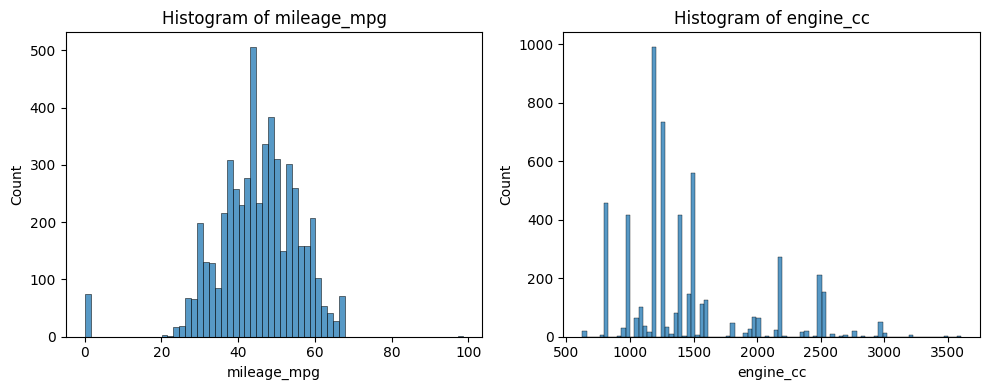

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(X_train, x="mileage_mpg", ax=axes[0])
axes[0].set_title("Histogram of mileage_mpg")

sns.histplot(X_train, x="engine_cc", ax=axes[1])
axes[1].set_title("Histogram of engine_cc")

plt.tight_layout()
plt.show()

## Demo 1 - Custom Implementation

In [ ]:
class CustomEqualWidthDiscretizer(BaseEstimator, TransformerMixin):
  """

  Description:
  ------------
  This is a transformer compatible with the scikit-learn api that will perform
  equal-width discretization of given numeric features

  """

  def __init__(self,
               variables,
               bins=10):
    """

    Parameters:
    ------------
    variables: sequence (list, array, tuple)
               The numeric features to transform
    bins: int
          The no. of bins to discretize the features into

    """
    self.variables = variables
    self.bins = bins


  def fit(self, X, y=None):
    """

    Parameters:
    ------------
    X: dataframe
       The dataset to learn the discretization mapping from

    y: array (optional)
       The target labels

    """
    self.variables_ = self.variables
    self.bins_dict_ = dict()

    for var in self.variables_:
      data = X.loc[:, var]
      out, bins = pd.cut(data,
                         bins=self.bins,
                         retbins=True)
      bins[0] = -np.inf
      bins[-1] = np.inf
      self.bins_dict_[var] = bins

    return self


  def transform(self, X):
    """

    Parameters:
    ------------
    X: dataframe
       The dataset to transform

    """
    return (
        X.assign(**{
            f"{var}": pd.cut(X.loc[:, var], bins=self.bins_dict_[var], labels=np.arange(self.bins)) for var in self.variables_
        })
    )

In [ ]:
custom_discretizer = CustomEqualWidthDiscretizer(variables=cols,
                                                 bins=10)

X_cewd = custom_discretizer.fit_transform(X_train)
X_cewd.head()

,company,model,year,owner,fuel,seller_type,transmission,km_driven,mileage_mpg,engine_cc,max_power_bhp,torque_nm,seats
2385,Hyundai,Xcent,2014,First,Petrol,Individual,Manual,80000,4,1,82.00,114.0,5.0
1295,Ford,Figo,2017,First,Diesel,Individual,Manual,35000,6,2,99.00,215.0,5.0
6279,Hyundai,Elantra,2013,First,Diesel,Dealer,Automatic,64000,3,2,113.42,250.0,5.0
5898,Maruti,Swift,2018,First,Diesel,Individual,Manual,25000,6,2,74.02,190.0,5.0
3870,Maruti,Swift,2013,First,Diesel,Individual,Manual,90000,5,2,74.00,190.0,5.0


In [ ]:
custom_discretizer.variables_

['mileage_mpg', 'engine_cc']

In [ ]:
custom_discretizer.bins_dict_

{'mileage_mpg': array([ -inf,  9.87, 19.74, 29.61, 39.48, 49.35, 59.22, 69.09, 78.96,
        88.83,   inf]),
 'engine_cc': array([ -inf,  922., 1220., 1518., 1816., 2114., 2412., 2710., 3008.,
        3306.,   inf])}

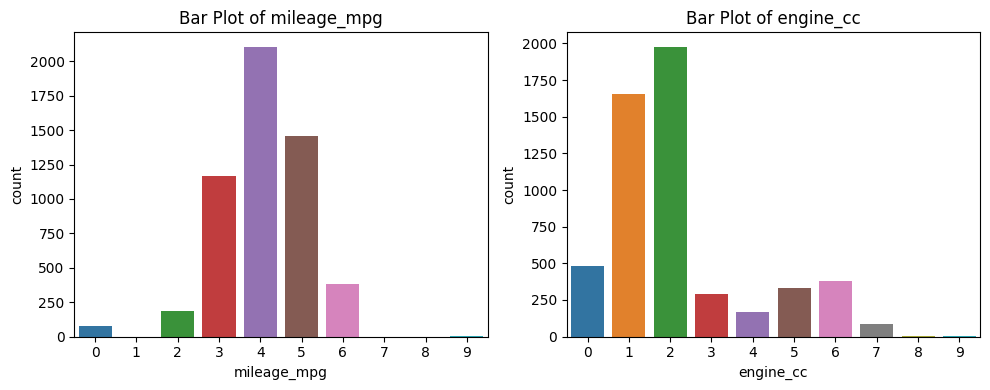

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(X_cewd, x="mileage_mpg", ax=axes[0])
axes[0].set_title("Bar Plot of mileage_mpg")

sns.countplot(X_cewd, x="engine_cc", ax=axes[1])
axes[1].set_title("Bar Plot of engine_cc")

plt.tight_layout()
plt.show()

## Demo 2 - Feature Engine

In [ ]:
discretizer = EqualWidthDiscretiser(variables=cols, bins=10)

X_ewd = discretizer.fit_transform(X_train)
X_ewd.head()

,company,model,year,owner,fuel,seller_type,transmission,km_driven,mileage_mpg,engine_cc,max_power_bhp,torque_nm,seats
2385,Hyundai,Xcent,2014,First,Petrol,Individual,Manual,80000,4,1,82.00,114.0,5.0
1295,Ford,Figo,2017,First,Diesel,Individual,Manual,35000,6,2,99.00,215.0,5.0
6279,Hyundai,Elantra,2013,First,Diesel,Dealer,Automatic,64000,3,2,113.42,250.0,5.0
5898,Maruti,Swift,2018,First,Diesel,Individual,Manual,25000,6,2,74.02,190.0,5.0
3870,Maruti,Swift,2013,First,Diesel,Individual,Manual,90000,5,2,74.00,190.0,5.0


In [ ]:
discretizer.variables_

['mileage_mpg', 'engine_cc']

In [ ]:
discretizer.binner_dict_

{'mileage_mpg': [-inf,
  9.870000000000001,
  19.740000000000002,
  29.610000000000003,
  39.480000000000004,
  49.35000000000001,
  59.220000000000006,
  69.09,
  78.96000000000001,
  88.83000000000001,
  inf],
 'engine_cc': [-inf,
  922.0,
  1220.0,
  1518.0,
  1816.0,
  2114.0,
  2412.0,
  2710.0,
  3008.0,
  3306.0,
  inf]}

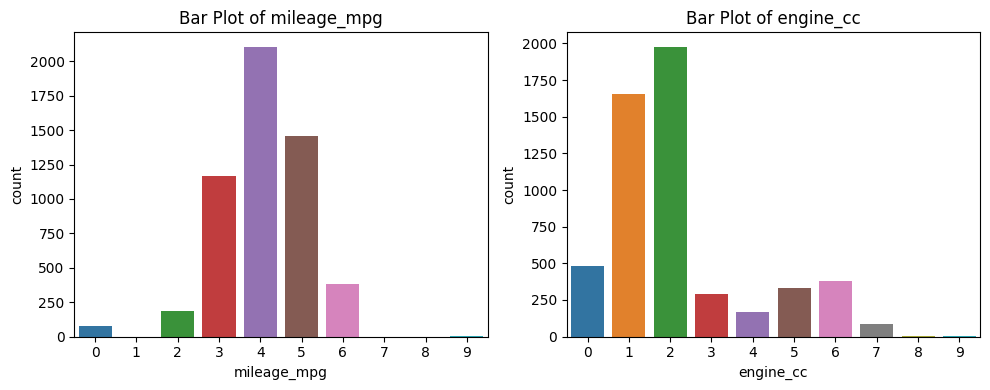

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(X_ewd, x="mileage_mpg", ax=axes[0], order=range(10))
axes[0].set_title("Bar Plot of mileage_mpg")

sns.countplot(X_ewd, x="engine_cc", ax=axes[1])
axes[1].set_title("Bar Plot of engine_cc")

plt.tight_layout()
plt.show()

## Demo 3 - Scikit-learn

In [ ]:
kbd = KBinsDiscretizer(n_bins=10,
                       encode="ordinal",
                       strategy="uniform",
                       random_state=7)

ct = ColumnTransformer(transformers=[
    ("kbins", kbd, cols)
], remainder="passthrough")

ct.fit(X)

X_kbd = pd.DataFrame(ct.transform(X),
                     columns=ct.get_feature_names_out(),
                     index=X.index)
X_kbd.head()

,kbins__mileage_mpg,kbins__engine_cc,remainder__company,remainder__model,remainder__year,remainder__owner,remainder__fuel,remainder__seller_type,remainder__transmission,remainder__km_driven,remainder__max_power_bhp,remainder__torque_nm,remainder__seats
0,5.0,2.0,Maruti,Swift,2014,First,Diesel,Individual,Manual,145500,74.0,190.0,5.0
1,5.0,2.0,Skoda,Rapid,2014,Second,Diesel,Individual,Manual,120000,103.52,250.0,5.0
2,4.0,2.0,Honda,City,2006,Third,Petrol,Individual,Manual,140000,78.0,124.544455,5.0
3,5.0,2.0,Hyundai,i20,2010,First,Diesel,Individual,Manual,127000,90.0,219.66896,5.0
4,3.0,2.0,Maruti,Swift,2007,First,Petrol,Individual,Manual,120000,88.2,112.776475,5.0


In [ ]:
ct.named_transformers_["kbins"].bin_edges_

array([array([ 0.  ,  9.87, 19.74, 29.61, 39.48, 49.35, 59.22, 69.09, 78.96,
              88.83, 98.7 ])                                                ,
       array([ 624.,  922., 1220., 1518., 1816., 2114., 2412., 2710., 3008.,
              3306., 3604.])                                                ],
      dtype=object)

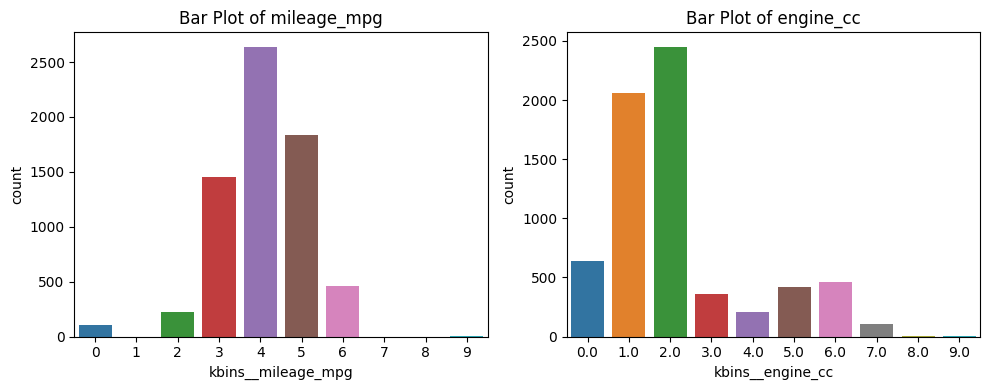

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(X_kbd, x="kbins__mileage_mpg", ax=axes[0], order=range(10))
axes[0].set_title("Bar Plot of mileage_mpg")

sns.countplot(X_kbd, x="kbins__engine_cc", ax=axes[1])
axes[1].set_title("Bar Plot of engine_cc")

plt.tight_layout()
plt.show()